In [1]:
import os
import numpy as np
import imageio

In [2]:
raw_path = '/Users/jiaor17/Desktop/pyt/md17/raw'

In [3]:
molecule_files = dict(
    aspirin="aspirin_dft.npz",
    benzene="benzene2017_dft.npz",
    ethanol="ethanol_dft.npz",
    malonaldehyde="malonaldehyde_dft.npz",
    naphthalene="naphthalene_dft.npz",
    salicylic_acid="salicylic_dft.npz",
    toluene="toluene_dft.npz",
    uracil="uracil_dft.npz",
)

In [4]:
tar_mol = 'aspirin'

In [5]:
npz_file = np.load(os.path.join(raw_path, molecule_files[tar_mol]))

In [6]:
dic = {1:'H', 6: 'C', 8:'O', 7:'N'}

In [7]:
from xyz2mol import *

In [8]:
mols = xyz2mol(npz_file['z'].tolist(), npz_file['R'][0].tolist(),
               charge=0,
               use_graph=True,
               allow_charged_fragments=True,
               embed_chiral=True,
               use_huckel=False)

In [9]:
example_mol = mols[0]

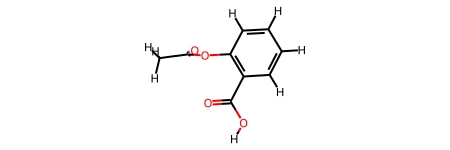

In [10]:
example_mol

In [11]:
def set_rdmol_positions(rdkit_mol, pos):
    """
    Args:
        rdkit_mol:  An `rdkit.Chem.rdchem.Mol` object.
        pos: (N_atoms, 3)
    """
    mol = copy.deepcopy(rdkit_mol)
    set_rdmol_positions_(mol, pos)
    return mol


def set_rdmol_positions_(mol, pos):
    """
    Args:
        rdkit_mol:  An `rdkit.Chem.rdchem.Mol` object.
        pos: (N_atoms, 3)
    """
    for i in range(pos.shape[0]):
        mol.GetConformer(0).SetAtomPosition(i, pos[i].tolist())
    return mol

In [12]:
from rdkit.Chem import PyMol

Run 'pymol -R' in Bash before the following block to start PyMol first. 

In [13]:
v = PyMol.MolViewer()

## Settings in PyMol

Display -> Background -> White

Display -> Color Space -> CMYK

Setting -> Lines & Sticks -> Ball and Stick

Setting -> Lines & Sticks -> Ball and Stick Ratio -> 1.5

In [14]:
# Visualize the example
v.ShowMol(example_mol)
v.server.do("color yellow, elem c")
v.server.do("color orange, elem h")
v.server.do("color blue, elem n")
v.server.do("color red, elem o")
img = v.GetPNG(h=300)
# You may adjust the view in PyMol for better visualization

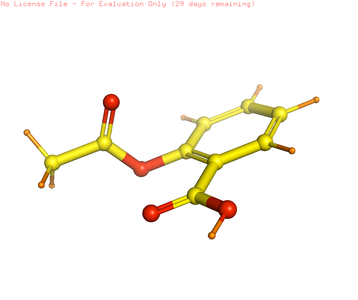

In [15]:
img

In [16]:
os.makedirs('vis',exist_ok=True)

In [17]:
from tqdm import tqdm

In [18]:
def get_traj_images(traj):
    imgs = []
    for i in tqdm(range(1000)):
        pos = traj[i]
        mol = set_rdmol_positions(example_mol, pos)
        v.ShowMol(mol)
        v.server.do("color yellow, elem c")
        v.server.do("color orange, elem h")
        v.server.do("color blue, elem n")
        v.server.do("color red, elem o")
        img = v.GetPNG(h=300)
        imgs.append(img)
    return imgs

In [19]:
# From Ground Truth
traj = npz_file['R'][10000:11000]

In [20]:
imgs = get_traj_images(traj)
out = imageio.mimsave(
            'vis/gt_asp_1000.gif',
            imgs, fps=50)

100%|██████████████████████████████████████████████████████████████| 1000/1000 [08:33<00:00,  1.95it/s]


In [23]:
# From Generated Pickle File
import pickle as pkl
with open('eval_result.pkl','rb') as f:
    trajs = pkl.load(f)
traj = trajs[1][0]

In [24]:
imgs = get_traj_images(traj)
out = imageio.mimsave(
            'vis/egnn_asp_1000.gif',
            imgs, fps=50)

100%|██████████████████████████████████████████████████████████████| 1000/1000 [08:22<00:00,  1.99it/s]
